# BHARAT INTERN-DATA SCIENCE

# DONE BY ROHITH.V

# TASK3: NUMBER RECOGNITION USING MNIST

In [29]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
len(x_train)
     

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

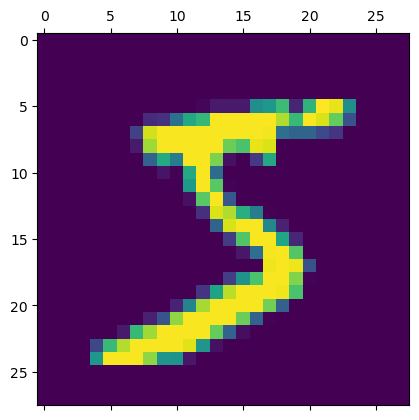

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

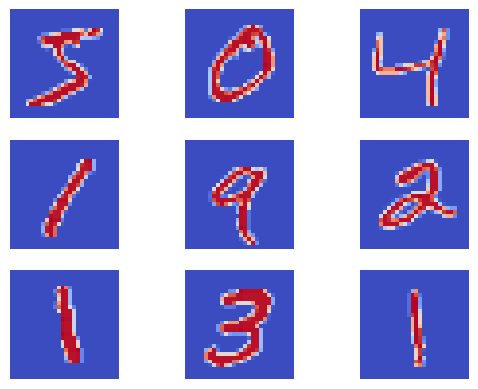

In [12]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap=plt.cm.coolwarm)
  plt.axis(False)

In [13]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4744 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9251


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, LSTM, Dropout
network=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation="relu"),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [16]:

network.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
network.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.3746 - accuracy: 0.0832


[2.3745815753936768, 0.08320000022649765]

In [18]:
network.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9268
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1125 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9855


In [19]:
y_predict=[]
predict=network.predict(x_test)
for i in predict:
  y_predict.append(np.argmax(i))

313/313 [==============================] - 0s 1ms/step


In [20]:
y_predict=np.array(y_predict)
y_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

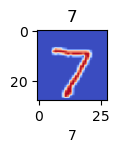

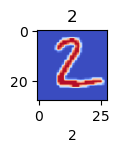

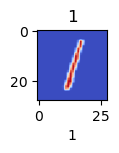

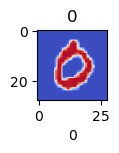

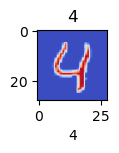

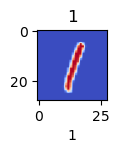

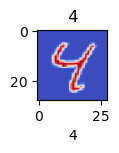

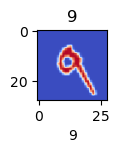

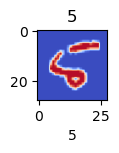

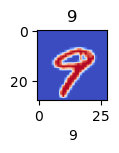

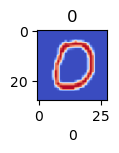

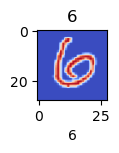

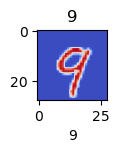

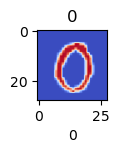

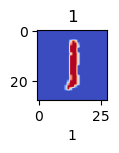

In [22]:
for i in range(0,15):
  plt.figure(figsize=(16,12))
  plt.subplot(1,15,i+1)
  plt.imshow(x_test[i],cmap=plt.cm.coolwarm)
  plt.xlabel(y_predict[i])
  plt.title(y_test[i])

In [23]:
real_val=y_test
predicted=y_predict
final=pd.DataFrame({"real_val ":real_val,"predicted ":predicted})
final.head(40)

,real_val,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [24]:
predict=network.predict(x_test)
print(np.argmax(predict[5]))
     

313/313 [==============================] - 1s 2ms/step
1


In [25]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.2826508e-02, 2.4217329e-07, 4.1111767e-02, 9.5216185e-01,
       1.4741289e-03, 1.0841253e-01, 1.6041874e-06, 9.9983025e-01,
       8.3756581e-02, 6.4192915e-01], dtype=float32)

In [26]:
np.argmax(y_predicted[0])

7

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

ACCURACY:

In [28]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2687 - accuracy: 0.9249


[0.26867029070854187, 0.9248999953269958]